In [11]:
import numpy as np
import matplotlib.pyplot as plt
import warnings

from KO_PDE_FIND import *

warnings.filterwarnings('ignore')

Learned PDE
u_t = (1.959796 +0.000000i)u_{x}
    + (0.521471 +0.000000i)u_{xx}
   


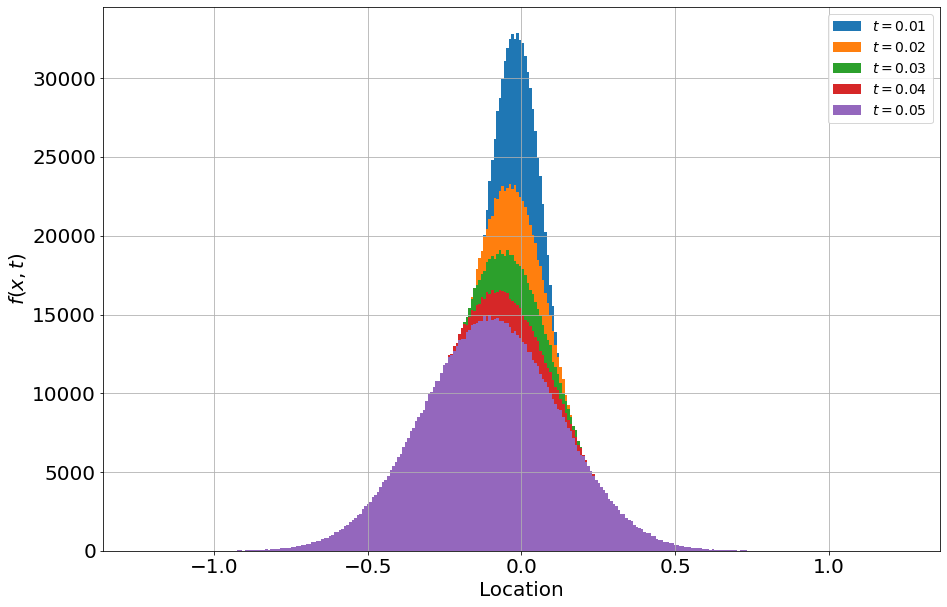

In [9]:
'Source Samuel Rudy 2016'

length = 10**6
dt = 0.01
c = -2
np.random.seed(0)
pos = np.cumsum(np.sqrt(dt)*np.random.randn(length)) + c*dt*np.arange(length)

P = {}
M = 0

m = 5
n = 300

for i in range(m):
    P[i] = []
    
for i in range(len(pos)-m):
    
    # center
    y = pos[i+1:i+m+1] - pos[i]
    M = max([M, max(abs(y))])
    
    # add to distribution
    for j in range(m):
        P[j].append(y[j])
    
bins = np.linspace(-M,M,n+1)
x = np.linspace(M*(1/n-1),M*(1-1/n),n)
dx = x[2]-x[1]
T = np.linspace(0,dt*(m-1),m)
U = np.zeros((n,m))

plt.figure(figsize=(15,10))
for i in range(m):
    U[:,i] = plt.hist(P[i],bins,label=r'$t = $' + str(i*dt+dt))[0]/float(dx*(len(pos)-m))

plt.xlabel('Location', fontsize = 20)
plt.ylabel(r'$f(x,t)$', fontsize = 20)
plt.xticks(fontsize = 20); plt.yticks(fontsize = 20)
plt.legend(loc = 'upper right', fontsize = 14)
plt.grid('on')
plt.savefig('../../Plots/srw_hist.png',dpi=256)

Ut,R,rhs_des = build_linear_system(U, dt, dx, D=4, P=5, time_diff = 'FD', deg_x = 4)

print("Learned PDE")
w = pdefind(R, Ut,10)
print_pde(w, rhs_des)

Learned PDE
u_t = (0.961886 +0.000000i)u_{x}
    + (0.508780 +0.000000i)u_{xx}
   
Learned PDE
u_t = (1.959796 +0.000000i)u_{x}
    + (0.521471 +0.000000i)u_{xx}
   
Learned PDE
u_t = (2.977422 +0.000000i)u_{x}
    + (0.536598 +0.000000i)u_{xx}
   
Learned PDE
u_t = (4.012516 +0.000000i)u_{x}
    + (0.473122 +0.000000i)u_{xx}
    + (-0.022697 +0.000000i)u^2u_{xx}
    + (-0.001143 +0.000000i)uu_{xxxx}
   
Learned PDE
u_t = (5.066989 +0.000000i)u_{x}
    + (0.434628 +0.000000i)u_{xx}
    + (-0.001597 +0.000000i)u_{xxxx}
   
Learned PDE
u_t = (6.131299 +0.000000i)u_{x}
    + (0.374418 +0.000000i)u_{xx}
    + (-0.001740 +0.000000i)u_{xxxx}
    + (-0.000400 +0.000000i)uu_{xxxx}
   


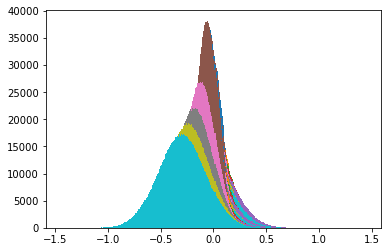

In [7]:
for c in [-1,-2,-3,-4,-5,-6]:
    np.random.seed(0)
    pos = np.cumsum(np.sqrt(dt)*np.random.randn(length)) + c*dt*np.arange(length)

    P = {}
    M = 0

    m = 5
    n = 300

    for i in range(m):
        P[i] = []

    for i in range(len(pos)-m):

        # center
        y = pos[i+1:i+m+1] - pos[i]
        M = max([M, max(abs(y))])

        # add to distribution
        for j in range(m):
            P[j].append(y[j])

    bins = np.linspace(-M,M,n+1)
    x = np.linspace(M*(1/n-1),M*(1-1/n),n)
    dx = x[2]-x[1]
    T = np.linspace(0,dt*(m-1),m)
    U = np.zeros((n,m))
    for i in range(m):
        U[:,i] = plt.hist(P[i],bins,label=r'$t = $' + str(i*dt+dt))[0]/float(dx*(len(pos)-m))
        
    Ut,R,rhs_des = build_linear_system(U, dt, dx, D=4, P=5, time_diff = 'FD', deg_x = 4)

    print("Learned PDE")
    w = pdefind(R, Ut,10)
    print_pde(w, rhs_des)